In [64]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#make data frame from given data
df = pd.read_csv(r'C:\Users\HP\Desktop\Data-LB\ML Project\CarDataSet.csv')

In [66]:
#print top 10 rows of data
df.head(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [67]:
#get the summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [68]:
#check null values in data
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In new price column, there are 6247 null values out of 7253. That are irrelevent in data, so drop the column new_price and unnamed.

In [69]:
#delete columns unnamed: 0 and New_Price
df.drop('Unnamed: 0',axis=1,inplace = True)
df.drop('New_Price',axis=1,inplace = True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 680.1+ KB


In [71]:
#make the columns homogeonous
df.columns = (i.lower() for i in df.columns)

In [72]:
df

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [73]:
#make a another column of car according to car brand
df['cars'] = df['name'].str.split(" ").str[0] + ' ' +df['name'].str.split(" ").str[1]
df.head(3)

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,price,cars
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda Jazz


In [74]:
#check unique brand in data
df['cars'].nunique()

223

In [75]:
#remove uneccessary data from columns
df['mileage'] = df['mileage'].str.replace('km/kg','')
df['mileage'] = df['mileage'].str.replace('kmpl','')
df['engine'] = df['engine'].str.replace('CC','')
df['power'] = df['power'].str.replace('bhp','')

In [76]:
#check numerical values in power 
a = [] 
for i in df['power']:
    if i=='null ':
        continue
    else:
        a.append(i)

In [77]:
a = np.array(a).astype(float)

In [78]:
a

array([ 58.16, 126.2 ,  88.7 , ...,  63.1 , 103.6 , 170.  ])

In [79]:
#find the mean of power
b = pd.DataFrame(a)
b.mean()

0    112.765214
dtype: float64

In [80]:
#replace the 'null ' by mean value 112.76
df['power'] = df['power'].str.replace('null ','112.76')

In [81]:
df.head(15)

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,price,cars
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,Honda Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,Audi A4
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1,814,55.2,5.0,2.35,Hyundai EON
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.1,5.0,3.50,Nissan Micra
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.5,8.0,17.50,Toyota Innova
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598,103.6,5.0,5.20,Volkswagen Vento
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3,1248,74,5.0,1.95,Tata Indica


In [83]:
#print last 1000m rows of data
df.tail(1000)

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,price,cars
6253,Hyundai Creta 1.6 CRDi SX,Bangalore,2015,29000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,Hyundai Creta
6254,Mahindra XUV500 W8 2WD,Kochi,2015,67365,Diesel,Manual,First,15.1,2179,140,7.0,NaN,Mahindra XUV500
6255,Mahindra XUV500 W8 2WD,Coimbatore,2014,67791,Diesel,Manual,First,15.1,2179,140,7.0,NaN,Mahindra XUV500
6256,Mahindra Thar CRDe AC,Hyderabad,2016,20000,Diesel,Manual,First,16.55,2498,105,6.0,NaN,Mahindra Thar
6257,Maruti Swift Dzire VDi,Jaipur,2011,90198,Diesel,Manual,Second,19.3,1248,73.9,5.0,NaN,Maruti Swift
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,NaN,Volkswagen Vento
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,NaN,Volkswagen Polo
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,NaN,Nissan Micra
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0,NaN,Volkswagen Polo


As we can see that in last 1000+ row price data is missing, we can't fill with mean values beacuse there are different brand at different price. and there are 223 unique brand of cars so it is not eaasy to fill values with mean of every car brand. lets delete the all null values.

In [84]:
df.isnull().sum()

name                    0
location                0
year                    0
kilometers_driven       0
fuel_type               0
transmission            0
owner_type              0
mileage                 2
engine                 46
power                  46
seats                  53
price                1234
cars                    0
dtype: int64

In [85]:
#convert object to float
df['mileage'] = df['mileage'].astype(float)
df['engine'] = df['engine'].astype(float)
df['power'] = df['power'].astype(float)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               7253 non-null   object 
 1   location           7253 non-null   object 
 2   year               7253 non-null   int64  
 3   kilometers_driven  7253 non-null   int64  
 4   fuel_type          7253 non-null   object 
 5   transmission       7253 non-null   object 
 6   owner_type         7253 non-null   object 
 7   mileage            7251 non-null   float64
 8   engine             7207 non-null   float64
 9   power              7207 non-null   float64
 10  seats              7200 non-null   float64
 11  price              6019 non-null   float64
 12  cars               7253 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


In [87]:
df['name'].nunique()

2041

In [89]:
#print car owner type
df['owner_type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [90]:
#replace car owner type object to integer
df['owner_type'] = df['owner_type'].map({'First':1,'Second':2,'Third':3,'Fourth & Above':4})

In [91]:
#delete of null values rows
df.dropna(axis = 0, inplace = True)

In [92]:
df.isnull().sum()

name                 0
location             0
year                 0
kilometers_driven    0
fuel_type            0
transmission         0
owner_type           0
mileage              0
engine               0
power                0
seats                0
price                0
cars                 0
dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5975 non-null   object 
 1   location           5975 non-null   object 
 2   year               5975 non-null   int64  
 3   kilometers_driven  5975 non-null   int64  
 4   fuel_type          5975 non-null   object 
 5   transmission       5975 non-null   object 
 6   owner_type         5975 non-null   int64  
 7   mileage            5975 non-null   float64
 8   engine             5975 non-null   float64
 9   power              5975 non-null   float64
 10  seats              5975 non-null   float64
 11  price              5975 non-null   float64
 12  cars               5975 non-null   object 
dtypes: float64(5), int64(3), object(5)
memory usage: 653.5+ KB


In [94]:
#check duplicate values in data
df.duplicated().sum().sum()

0

In [95]:
#Check description of data
df.describe()

,year,kilometers_driven,owner_type,mileage,engine,power,seats,price
count,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,1.200669,18.179408,1621.606695,113.267983,5.278828,9.501647
std,3.247238,9.155851e+04,0.453458,4.521801,601.036987,53.415416,0.808959,11.205736
min,1998.000000,1.710000e+02,1.000000,0.000000,624.000000,34.200000,0.000000,0.440000
25%,2012.000000,3.390800e+04,1.000000,15.200000,1198.000000,77.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,1.000000,18.160000,1493.000000,98.600000,5.000000,5.650000
75%,2016.000000,7.300000e+04,1.000000,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,4.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


# EDA

In [96]:
#check the correlation
df.corr()

,year,kilometers_driven,owner_type,mileage,engine,power,seats,price
year,1.000000,-0.172663,-0.394100,0.314417,-0.052538,0.014305,0.012338,0.305800
kilometers_driven,-0.172663,1.000000,0.084797,-0.064991,0.090832,0.033384,0.083101,-0.011263
owner_type,-0.394100,0.084797,1.000000,-0.161366,0.051892,0.025242,0.014002,-0.097054
mileage,0.314417,-0.064991,-0.161366,1.000000,-0.598638,-0.515525,-0.308226,-0.313877
engine,-0.052538,0.090832,0.051892,-0.598638,1.000000,0.859729,0.393435,0.659117
power,0.014305,0.033384,0.025242,-0.515525,0.859729,1.000000,0.100156,0.769227
seats,0.012338,0.083101,0.014002,-0.308226,0.393435,0.100156,1.000000,0.052262
price,0.305800,-0.011263,-0.097054,-0.313877,0.659117,0.769227,0.052262,1.000000


In [97]:
df.head()

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,price,cars
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,1.75,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,12.50,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,4.50,Honda Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,6.00,Maruti Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74,Audi A4


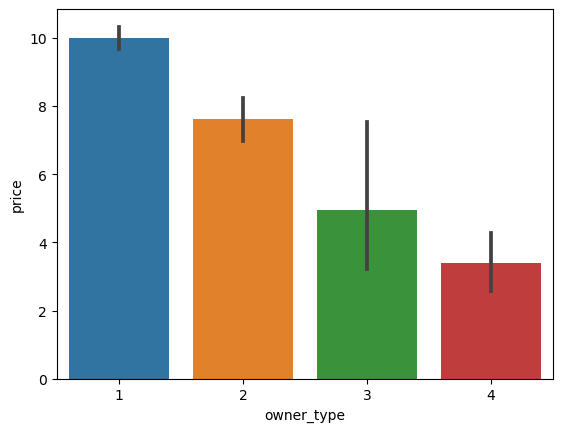

In [34]:
sns.barplot(x = 'owner_type',y = 'price', data=df)
plt.show()

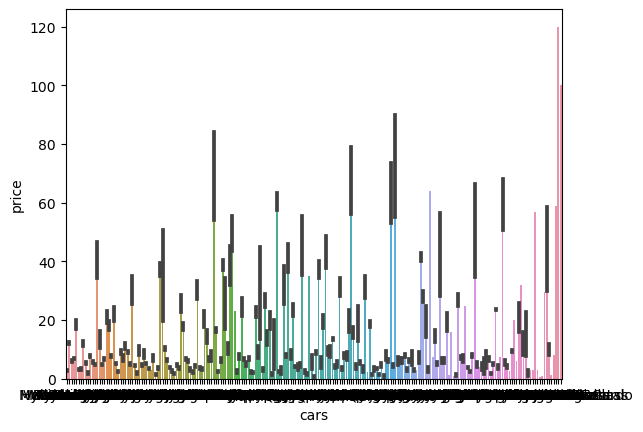

In [35]:
sns.barplot(x = 'cars',y = 'price', data=df)
plt.show()

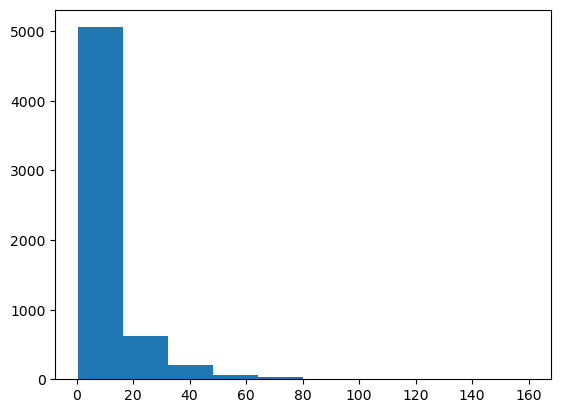

In [36]:
plt.hist(df['price'])
plt.show()

C:\Users\HP\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

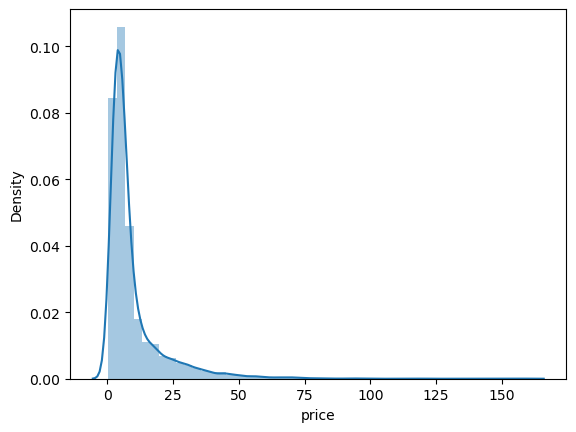

In [37]:
sns.distplot(df['price'])

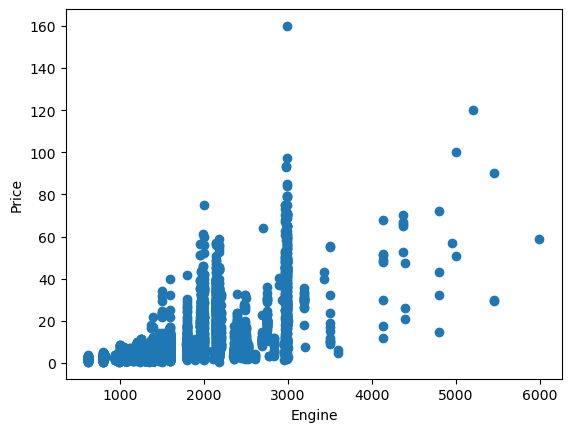

In [38]:
plt.scatter(df['engine'],df['price'])
plt.xlabel('Engine')
plt.ylabel('Price')
plt.show()

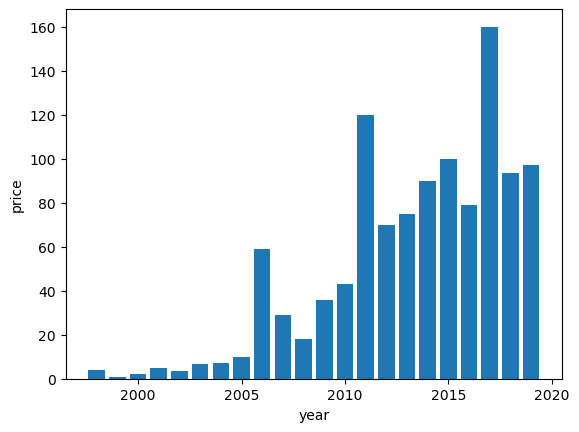

In [39]:
plt.bar(df['year'],df['price'])
plt.xlabel('year')
plt.ylabel('price')
plt.show()

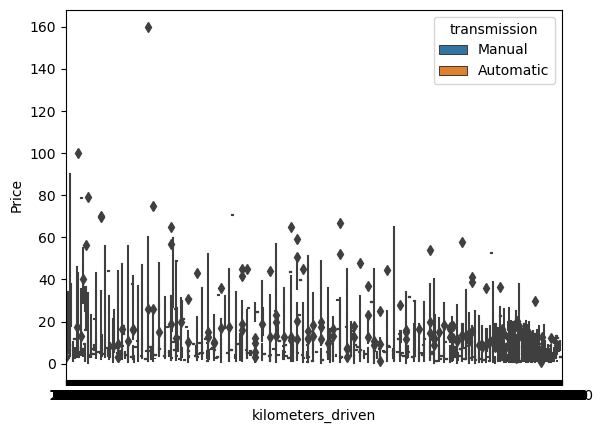

In [109]:
sns.boxplot(data = df, x = 'kilometers_driven',y = 'price',hue = 'transmission')
plt.xlabel('kilometers_driven')
plt.ylabel('Price')
plt.show()

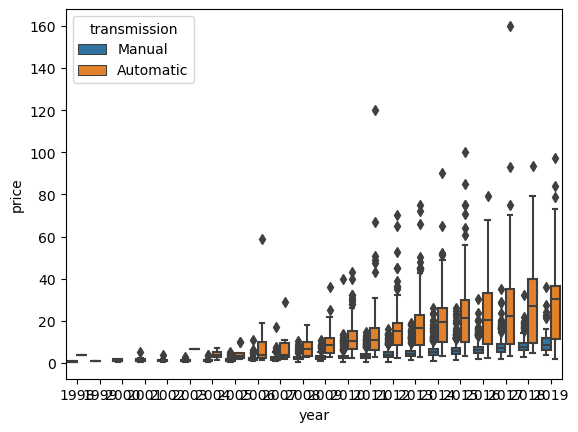

In [110]:

sns.boxplot(data = df,x = 'year',y = 'price', hue = 'transmission')
plt.xlabel('year')
plt.ylabel('price')
plt.show()

<AxesSubplot:>

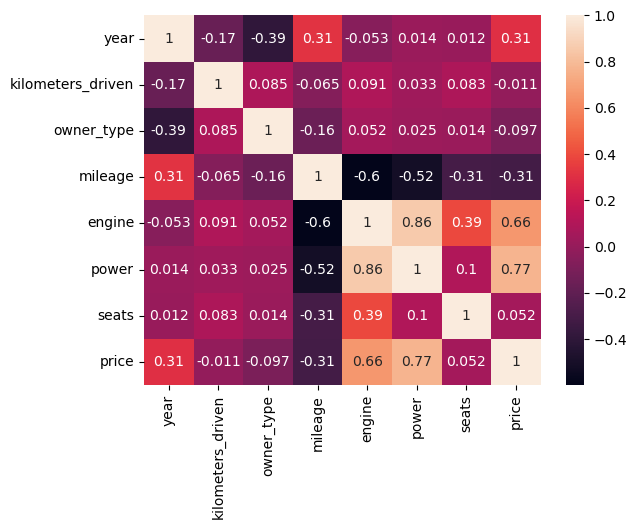

In [40]:
sns.heatmap(data = df.corr(),annot = True)

In [98]:
#Extraxt target value
y = df['price'].values.reshape(-1,1)
y

array([[ 1.75],
       [12.5 ],
       [ 4.5 ],
       ...,
       [ 2.9 ],
       [ 2.65],
       [ 2.5 ]])

In [99]:
df.head(2)

,name,location,year,kilometers_driven,fuel_type,transmission,owner_type,mileage,engine,power,seats,price,cars
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,1.75,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,12.50,Hyundai Creta


In [100]:
#Extraxt feature power and engine
x = df.iloc[:,8:10]

In [101]:
x

,engine,power
0,998.0,58.16
1,1582.0,126.20
2,1199.0,88.70
3,1248.0,88.76
4,1968.0,140.80
...,...,...
6014,1248.0,74.00
6015,1120.0,71.00
6016,2498.0,112.00
6017,998.0,67.10


In [102]:
from sklearn.model_selection import train_test_split

In [103]:
#split the data for train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [104]:
x_train

,engine,power
5333,1248.0,88.76
1822,1198.0,77.00
2638,998.0,58.20
2931,1198.0,86.70
5151,1199.0,73.90
...,...,...
3799,2143.0,203.00
5233,1248.0,73.94
5268,1197.0,80.00
5433,1086.0,68.05


In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
reg = LinearRegression()

In [107]:
#train the model
reg.fit(x_train,y_train)

LinearRegression()

In [108]:
reg.intercept_

array([-7.93235173])

In [109]:
reg.coef_

array([[-0.00039533,  0.1586813 ]])

In [110]:
y_pred = reg.predict(x_test)

In [111]:
y_pred

array([[18.95255568],
       [ 7.12142467],
       [18.1962835 ],
       ...,
       [20.00028611],
       [ 8.70699659],
       [-0.90008777]])

In [112]:
df_pred = pd.DataFrame({'Actual':y_test.squeeze(),'Predicted':y_pred.squeeze()})

In [113]:
df_pred

,Actual,Predicted
0,17.56,18.952556
1,6.60,7.121425
2,11.50,18.196283
3,38.00,17.069221
4,9.66,7.741658
...,...,...
1788,8.47,4.780858
1789,9.50,10.089160
1790,9.25,20.000286
1791,6.50,8.706997


In [114]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [115]:
mae = mean_absolute_error(y_test,y_pred)
mae

4.361331415352287

In [116]:
mse = mean_squared_error(y_test,y_pred)
mse

65.4695817688338

In [117]:
rsme = np.sqrt(mse)
rsme

8.091327565290742